# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Willa Wikarsi
- **Email:** willawikarsi05@gmail.com
- **ID Dicoding:** Willa Wikarsi

## Menentukan Pertanyaan Bisnis
#### Kita membuat pertanyaan bisnis dari dataset yang digunakan dengan minimal 2 pertanyaan.

- Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
- Pertanyaan 2 : Bagaimana tren pertumbuhan jumlah peminjaman sepeda dari tahun 201 ke 2012?
- Pertanyaan 3 : Bagaimana pola peminjaman sepeda berdasarkan waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Gathering Data

In [11]:
# Membaca dataset
df = pd.read_csv('Data/hour.csv')

# Menampilkan informasi dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan 5 baris pertama
print("\nContoh Data:")
print(df.head())

# Menampilkan jumlah baris dan kolom
print("\nJumlah baris dan kolom:", df.shape)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Contoh Data:
   instant 

**Insight:**
- xxx
- xxx

### Assessing Data

In [3]:
# Mengecek missing values
print("Missing Values:")
print(df.isnull().sum())

# Mengecek data duplikat
print("\nJumlah duplikasi:", df.duplicated().sum())

# Statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif:")
print(df.describe())

# Mengecek nilai unik pada kolom kategorikal
kategori_cols = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]
print("\nNilai unik pada kolom kategorikal:")
for col in kategori_cols:
    print(f"{col}: {df[col].unique()}")


Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikasi: 0

Statistik Deskriptif:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.

**Insight:**
- xxx
- xxx

### Cleaning Data

In [4]:
# 1. Menghapus duplikasi jika ada
df = df.drop_duplicates()

# 2. Mengonversi kolom 'dteday' menjadi tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# 3. Mengubah suhu dari skala 0-1 ke Celsius (maks suhu dalam dataset = 41°C)
df['temp_C'] = df['temp'] * 41

# 4. Menambahkan label kategori untuk 'season'
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df['season_label'] = df['season'].map(season_map)

# 5. Menambahkan label kategori untuk 'weathersit'
weather_map = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan ringan",
    4: "Hujan lebat"
}
df['weather_label'] = df['weathersit'].map(weather_map)

# Menampilkan hasil setelah cleaning
print(df.head())


   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  temp_C  \
0           1  0.24  0.2879  0.81        0.0       3          13   16    9.84   
1           1  0.22  0.2727  0.80        0.0       8          32   40    9.02   
2           1  0.22  0.2727  0.80        0.0       5          27   32    9.02   
3           1  0.24  0.2879  0.75        0.0       3          10   13    9.84   
4           1  0.24  0.2879  0.75        0.0       0           1    1    9.84   

  season_label weather_label  
0       Spring     

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# Konversi kolom 'dteday' menjadi tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Menambahkan label kategori untuk 'season'
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df['season_label'] = df['season'].map(season_map)

# Menambahkan label kategori untuk 'weathersit'
weather_map = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan ringan",
    4: "Hujan lebat"
}
df['weather_label'] = df['weathersit'].map(weather_map)

# 1. Analisis pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda
print("\nRata-rata peminjaman sepeda berdasarkan kondisi cuaca:")
print(df.groupby("weather_label")["cnt"].describe())

# 2. Tren pertumbuhan jumlah peminjaman sepeda (2011 vs 2012)
print("\nTotal peminjaman sepeda per tahun:")
print(df.groupby("yr")["cnt"].sum())

# 3. Pola peminjaman sepeda berdasarkan waktu (jam)
print("\nRata-rata peminjaman sepeda per jam:")
print(df.groupby("hr")["cnt"].mean())


Rata-rata peminjaman sepeda berdasarkan kondisi cuaca:
                 count        mean         std   min   25%    50%    75%  \
weather_label                                                              
Berawan         4544.0  175.165493  165.431589   1.0  40.0  133.0  257.0   
Cerah          11413.0  204.869272  189.487773   1.0  46.0  159.0  304.0   
Hujan lebat        3.0   74.333333   77.925178  23.0  29.5   36.0  100.0   
Hujan ringan    1419.0  111.579281  133.781045   1.0  21.0   63.0  152.5   

                 max  
weather_label         
Berawan        957.0  
Cerah          977.0  
Hujan lebat    164.0  
Hujan ringan   891.0  

Total peminjaman sepeda per tahun:
yr
0    1243103
1    2049576
Name: cnt, dtype: int64

Rata-rata peminjaman sepeda per jam:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.31593

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\ACER\AppData\Local\Temp\ipykernel_6832\3410543834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weather_label", y="cnt", data=df, palette="coolwarm")


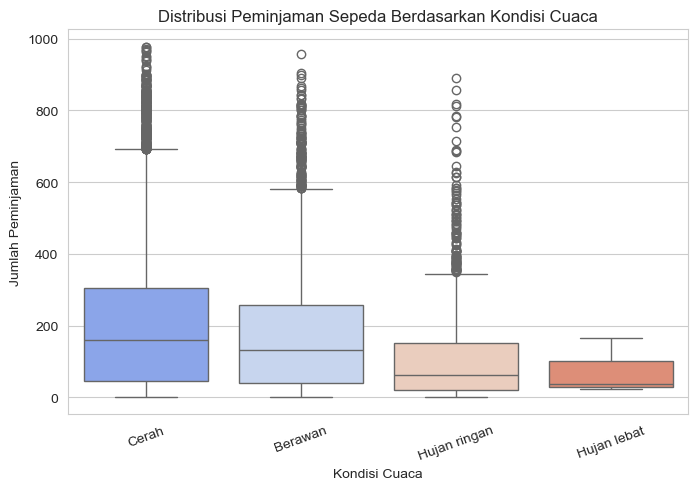

In [6]:
sns.set_style("whitegrid")  # Mengatur style visualisasi

# 1. Visualisasi Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda
plt.figure(figsize=(8, 5))
sns.boxplot(x="weather_label", y="cnt", data=df, palette="coolwarm")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=20)
plt.show()

### Pertanyaan 2:

C:\Users\ACER\AppData\Local\Temp\ipykernel_6832\2652857361.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="mnth", y="cnt", hue="yr", data=df, ci=None, marker="o", palette="muted")


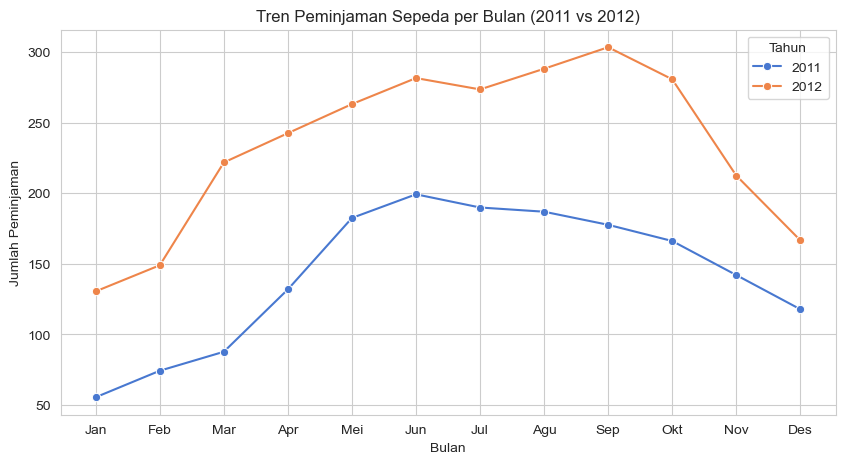

In [7]:
# 2. Visualisasi Tren Peminjaman Sepeda per Bulan (2011 vs 2012)
plt.figure(figsize=(10, 5))
sns.lineplot(x="mnth", y="cnt", hue="yr", data=df, ci=None, marker="o", palette="muted")
plt.title("Tren Peminjaman Sepeda per Bulan (2011 vs 2012)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.legend(title="Tahun", labels=["2011", "2012"])
plt.show()

### Pertanyaan 3:

C:\Users\ACER\AppData\Local\Temp\ipykernel_6832\3277345353.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=df, ci=None, marker="o", color="b")


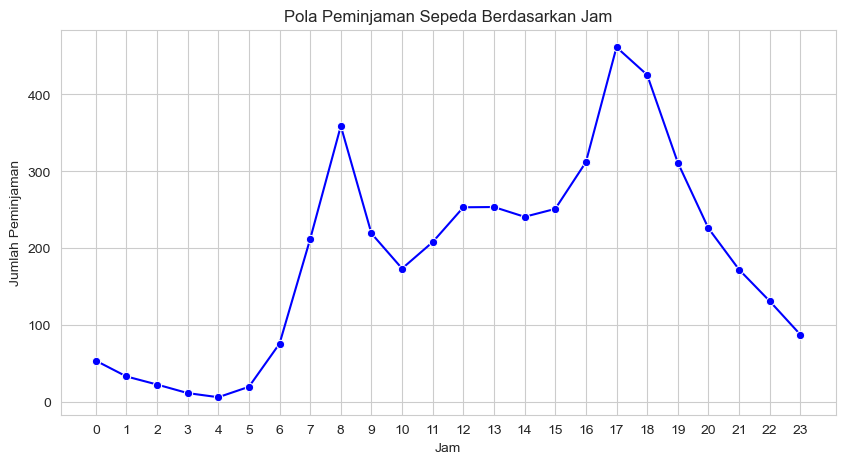

In [8]:
# 3. Visualisasi Pola Peminjaman Sepeda Berdasarkan Waktu (Per Jam)
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=df, ci=None, marker="o", color="b")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(ticks=range(0, 24))
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

usage_category
Sedang    5823
Rendah    5797
Tinggi    5759
Name: count, dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_6832\4287521674.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="usage_category", y="cnt", data=df, palette="viridis")


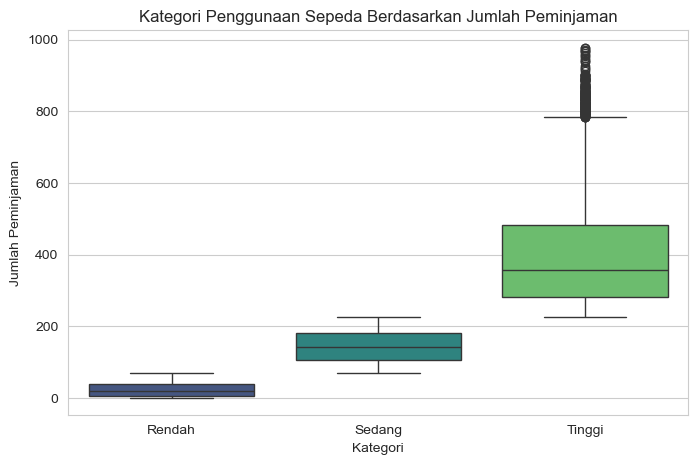

In [9]:
# Membuat kategori peminjaman sepeda berdasarkan kuantil
df["usage_category"] = pd.qcut(df["cnt"], q=3, labels=["Rendah", "Sedang", "Tinggi"])

# Menampilkan distribusi kategori
print(df["usage_category"].value_counts())

# Visualisasi kategori peminjaman
plt.figure(figsize=(8, 5))
sns.boxplot(x="usage_category", y="cnt", data=df, palette="viridis")
plt.title("Kategori Penggunaan Sepeda Berdasarkan Jumlah Peminjaman")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Peminjaman")
plt.show()


In [10]:
df.to_csv('/Users/ACER/Submission/Dashboard/hour_clean.csv', index=False)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2